# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def linear(u,v):
    return np.dot(u,v)
def poly(u,v,k_p):
    return pow((np.dot(u,v)+1),k_p)
def rbf(u,v,k_p):
    val=np.linalg.norm(u-v)**2
    val=-1*k_p*val
    val=np.exp(val)
    return val
def sigmoid(x):
    if x >= 100:
        return 1
    elif x <= -100:
        return 0
    return (1/(1+np.exp(-x)))

def train_pred_logistic_regression(X, Y,lr=0.001, kernel='linear', reg_param=0.,kernel_param=1., num_iter_gd=100):
    eta=lr
    K=np.zeros(shape=(X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if (kernel=='linear'):
                K[i][j]=linear(X[i,:],X[j,:])
            elif (kernel=='poly'):
                K[i][j]=poly(X[i,:],X[j,:],kernel_param)
            else:
                K[i][j]=rbf(X[i,:],X[j,:],kernel_param)
    alpha=np.zeros(X.shape[0])
    for _ in range(num_iter_gd):
        a2=  reg_param*np.matmul(K,alpha)
        a1=  np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            a1+=sigmoid(-Y[i]*(alpha.reshape(1,X.shape[0])@K[:,i]))*(-Y[i]*K[:,i])
        grad_r= a1+a2
        alpha=alpha - (eta*grad_r)
    return alpha

def zero_one_error(preds,y_test):
    return (np.sum(np.abs(preds-y_test))/(2*y_test.shape[0]))

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    ypred=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        a=0
        for j in range(train_X.shape[0]):
            if kernel=='linear':
                k=linear(train_X[j],test_X[i])
            elif kernel=='poly':
                k=poly(train_X[j],test_X[i],kernel_param)
            else:
                k=rbf(train_X[j],test_X[i],kernel_param)
            a+=k*alpha[j]
        if sigmoid(a)-0.5>=0:
          ypred[i]=1
        else:
          ypred[i]=-1  
    return ypred

In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

def validation(X_train,Y_train,X_valid,Y_valid,X_test,Y_test,learning_rate,kernel='linear'):

    reg_param=[1e-3,1e-2,1e-1,0,1,10] 
    alpha=np.zeros(len(X_train))
    r_param=0
    k_param=1
    
    if kernel=='linear':
        reg_error=1
        for val in reg_param:
            a=train_pred_logistic_regression(X_train, Y_train,learning_rate, kernel=kernel, reg_param=val,kernel_param=1, 
                                             num_iter_gd=100)
            b=test_pred(a, X_train, Y_train, X_valid, kernel=kernel, kernel_param=1.)
            zero_error=zero_one_error(b,Y_valid)
            if zero_error < reg_error:
                reg_error=zero_error
                alpha=a
                r_param=val
        pred=test_pred(alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=k_param) 
        return zero_one_error(pred,Y_test),alpha,r_param,k_param,reg_error  
                
    if kernel=='poly':
        kernel_param=[1,2,3,4]
        k_error=1
        reg_error=1
        
        for val in kernel_param:
            a=train_pred_logistic_regression(X_train, Y_train,learning_rate, kernel=kernel, reg_param=0.,kernel_param=val, 
                                             num_iter_gd=100)
            b=test_pred(a, X_train, Y_train, X_valid, kernel=kernel, kernel_param=val)
            zero_error=zero_one_error(b,Y_valid)
            if zero_error < k_error:
                k_error=zero_error
                k_param=val
                
        for val in reg_param:
            a=train_pred_logistic_regression(X_train, Y_train,learning_rate, kernel=kernel,reg_param=val,
                                             kernel_param=k_param,num_iter_gd=100)
            b=test_pred(a, X_train, Y_train, X_valid, kernel=kernel, kernel_param=k_param)
            zero_error=zero_one_error(b,Y_valid)
            if zero_error < reg_error:
                reg_error=zero_error
                alpha=a
                r_param=val
        pred=test_pred(alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=k_param) 
        return zero_one_error(pred,Y_test),alpha,r_param,k_param,reg_error
    
    if kernel=='rbf':
        k_error=1
        reg_error=1
        gamma = [0.001,0.01,0.05,0.1,0.5,1,10]
        
        for val in gamma:
            a=train_pred_logistic_regression(X_train, Y_train,learning_rate, kernel=kernel, reg_param=0.,kernel_param=val, 
                                             num_iter_gd=100)
            b=test_pred(a, X_train, Y_train, X_valid, kernel=kernel, kernel_param=val)
            zero_error=zero_one_error(b,Y_valid)
            if zero_error < k_error:
                k_error=zero_error
                k_param=val
                
        for val in reg_param:
            a=train_pred_logistic_regression(X_train, Y_train,learning_rate, kernel=kernel,reg_param=val,kernel_param=k_param,
                                             num_iter_gd=100)
            b=test_pred(a, X_train, Y_train, X_valid, kernel=kernel, kernel_param=k_param)
            zero_error=zero_one_error(b,Y_valid)
            if zero_error < reg_error:
                reg_error=zero_error
                alpha=a
                r_param=val
            
        pred=test_pred(alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=k_param)  
        return zero_one_error(pred,Y_test),alpha,r_param,k_param,reg_error
    
X_train_all=[]
X_valid_all=[]
Y_train_all=[]
Y_valid_all=[]
X_test_all=[]
Y_test_all=[]
kernel_param=[]
reg_param=[]
zero_error_valid=[]
zero_error_test=[]
l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz"]
#l=["dataset_A.npz","dataset_B.npz"]
for i in l:    
    train=np.load(i)
    X=train[train.files[0]]
    Y=train[train.files[1]]
    X_test=train[train.files[2]]
    Y_test=train[train.files[3]]
    indices = np.random.permutation(len(X))
    Valid_set_size = int(len(X) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train=X[ind1]
    X_valid=X[ind]
    Y_train=Y[ind1]
    Y_valid=Y[ind]
    kernel=['linear','poly','rbf']
    X_train_all.append(X_train)
    X_valid_all.append(X_valid)
    Y_train_all.append(Y_train)
    Y_valid_all.append(Y_valid)
    X_test_all.append(X_test)
    Y_test_all.append(Y_test)
    for j in kernel:
        test_error,alpha,r_param,k_param,error=validation(X_train,Y_train,X_valid,Y_valid,X_test,Y_test,0.00001,j)
        kernel_param.append(k_param)
        reg_param.append(r_param)
        zero_error_test.append(test_error)
        zero_error_valid.append(error)

#running on Dataset C and Dataset D
l=["../../Data/dataset_C.npz","../../Data/dataset_D.npz"]
for i in l:    
    train=np.load(i)
    X=train[train.files[0]]
    Y=train[train.files[1]]
    X_test=train[train.files[2]]
    Y_test=train[train.files[3]]
    indices = np.random.permutation(len(X))
    Valid_set_size = int(len(X) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train=X[ind1]
    X_valid=X[ind]
    Y_train=Y[ind1]
    Y_valid=Y[ind]
    kernel=['linear','poly','rbf']
    for j in kernel:
        test_error,alpha,r_param,k_param,error=validation(X_train,Y_train,X_valid,Y_valid,X_test,Y_test,0.000000001,j)
        kernel_param.append(k_param)
        reg_param.append(r_param)
        zero_error_test.append(test_error)
        zero_error_valid.append(error)

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).

<b>Observations</b><br><br>
<b>Best parameters and errors </b><br>
<b>dataset_A</b><br>
-From plots we can abserve the data is not <b>lineraly seperable</b> and hence linear kernel does not perform well and gives ~15% error on test data.<br> 
-We expect poly and rbf to perform well but only rbf being exponential kernel gives test error of <b>0.4%</b> whereas poly gives test error of <b>13.2%</b>.<br>
-reason for poly kernel giving large error can be for chosen learning rate for poly kernel, alphas are not converging in 100 iteration   



|   kernel     | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 11.0              | 14.6             |
| poly   | 0.001     | 1            | 11.333            | 13.2             |
| rbf    | 0.001     | 10           | 0.00              | 0.4              |              |

<b>dataset_B</b><br>
-all kernels performs almost equally 

|   kernel     | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 10        | -            | 14.334            | 20.0             |
| poly   | 0.001     | 1            | 15.332            | 19.8             |
| rbf    | 0.001     | 0.5          | 15.332            | 19.6             |

<b>dataset_C</b><br>
-even if we can't visualise the dataset we can see that test error for linear kernel is very large and hence it is sure that data has complex variation   

|  kernel      | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 39.667            | 45.454           |
| poly   | 0         | 4            | 12.667            | 11.784           |
| rbf    | 0.001     | 0.01         | 0.0               | 2.69             |

<b>dataset_D</b><br>
-the dataset is well classified by a rbf kernel than other kernels.  

|     kernel   | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.1       | -            | 41.25             | 21.30            |
| poly   | 0.0       | 2            | 46.25             | 23.07            |
| rbf    | 0.001     | 0.001        | 11.25             | 6.51             |




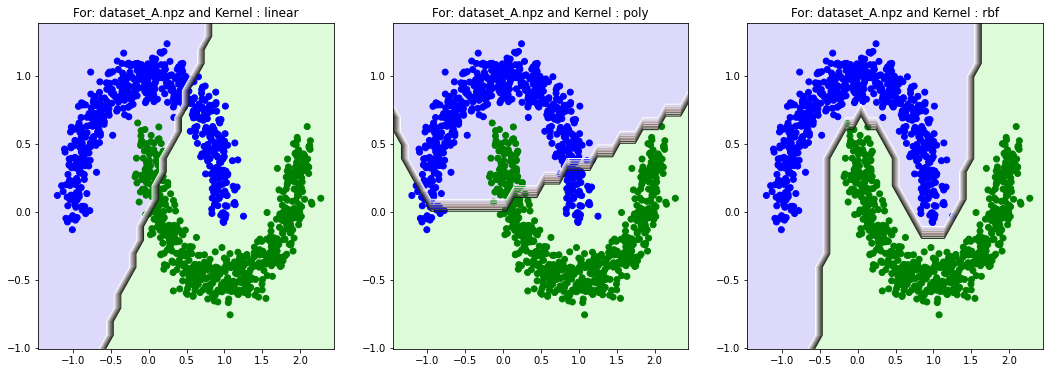

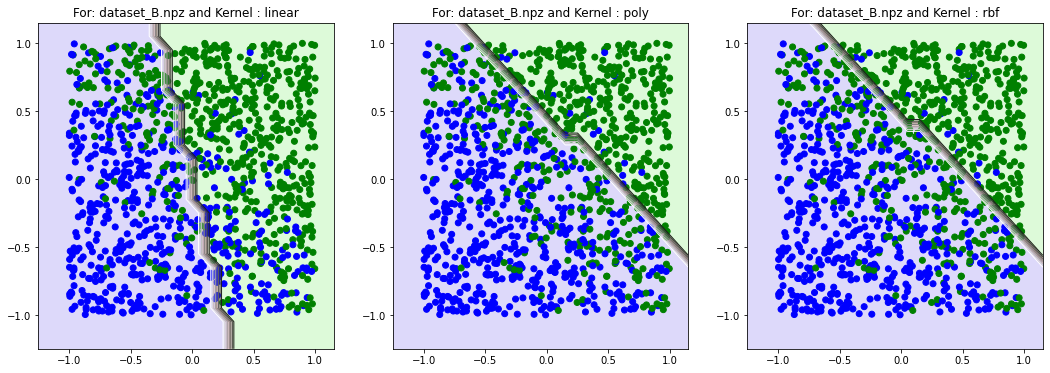

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz"]
#l=["dataset_A.npz","dataset_B.npz"]
kernels=['linear','poly','rbf']
ct=0
for i in range(2):
    X_min, X_max = X_train_all[i][:, 0].min()-.25 , X_train_all[i][:, 0].max()+.25 
    Y_min, Y_max = X_train_all[i][:, 1].min()-.25 , X_train_all[i][:, 1].max()+.25
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),
                     np.arange(Y_min, Y_max, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    plt.figure(figsize=(18,6))
    for j in kernels:
        a=train_pred_logistic_regression(X_train_all[i], Y_train_all[i], kernel=j, reg_param=reg_param[ct],
                                         kernel_param=kernel_param[ct],num_iter_gd=100)
        b=test_pred(a, X_train_all[i], Y_train_all[i], grid, kernel=j, kernel_param=kernel_param[ct])
        plt.subplot(1, 3, ct%3+1)
        plt.title("For: {} and Kernel : {}".format(l[i],j))
        plt.contourf(xx, yy, b.reshape(xx.shape),alpha=0.15,cmap="brg")
        plt.contour(xx, yy, b.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1)
        plt.scatter(X_train_all[i].T[0],X_train_all[i].T[1],color=['blue' if Y_train_all[i][j]==-1 else 'green' 
                                                                   for j in range(len(X_train_all[i]))])
        ct+=1
    plt.show()
    

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here
def SVM_classifier(X, Y, kernel, kernel_param, C):
    classif_algo = svm.SVC(C=C, kernel=kernel, degree=kernel_param, gamma=kernel_param, max_iter=1e7)
    classifier = classif_algo.fit(X,Y)
    return classifier

In [ ]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
data = ["../../Data/dataset_A.npz","../../Data/dataset_B.npz","../../Data/dataset_C.npz"
                        ,"../../Data/dataset_D.npz"]

X_train_all=[]
X_valid_all=[]
Y_train_all=[]
Y_valid_all=[]
X_test_all=[]
Y_test_all=[]
kernel_param=[]
C_param=[]
zero_error_valid=[]
zero_error_test=[]


for z in data:    
    train = np.load(z)
    X = train[train.files[0]]
    Y = train[train.files[1]]
    X_test = train[train.files[2]]
    Y_test = train[train.files[3]]
    indices = np.random.permutation(len(X))
    Valid_set_size = int(len(X) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train=X[ind1]
    X_valid=X[ind]
    Y_train=Y[ind1]
    Y_valid=Y[ind]
    X_train_all.append(X_train)
    X_valid_all.append(X_valid)
    Y_train_all.append(Y_train)
    Y_valid_all.append(Y_valid)
    X_test_all.append(X_test)
    Y_test_all.append(Y_test)
   
    ##Linear
    C = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    acc=np.zeros(len(C))
    for i in range(len(C)):
        pred_valid_Y = SVM_classifier(X_train, Y_train, 'linear', 1, C[i]).predict(X_valid)
        acc[i] = np.sum(pred_valid_Y == Y_valid)
    best_lin_param = C[np.argmax(acc)]    
       
    best_classifier = SVM_classifier(X, Y, 'linear', 1, best_lin_param)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(X_test)
    
    valid_err = (1-acc[np.argmax(acc)]/len(Y_valid))*100
    train_err = np.sum(Y != pred_Y)/len(Y)*100
    test_err = np.sum(Y_test != pred_test_Y)/len(Y_test)*100
    
    kernel_param.append(1)
    C_param.append(best_lin_param)
    zero_error_test.append(test_err)
    zero_error_valid.append(valid_err)
    
    ##Poly
    C = [1e-3,1e-2,1e-1,1,1e1]
    k = [1,2,3,4]
    acc = np.zeros((len(C), len(k)))
    for i in range(len(C)):
        for j in range(len(k)):
            pred_valid_Y = SVM_classifier(X_train, Y_train, 'poly', k[j], C[i]).predict(X_valid)
            acc[i,j] = np.sum(pred_valid_Y == Y_valid)
    arg = np.argwhere(acc == np.max(acc))[0]
    best_C = C[arg[0]]
    best_k = k[arg[1]]
    valid_err = (1-acc[arg[0], arg[1]]/len(Y_valid))*100
    best_poly_param = (best_k, best_C)
    
    best_classifier = SVM_classifier(X, Y, 'poly', best_k, best_C)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(X_test)
    
    train_err = np.sum(Y != pred_Y)/len(Y)*100
    test_err = np.sum(Y_test != pred_test_Y)/len(Y_test)*100
    
    kernel_param.append(best_k)
    C_param.append(best_C)
    zero_error_test.append(test_err)
    zero_error_valid.append(valid_err)
    
    ##rbf
    C = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    k = [0.001,0.01,0.05,0.1,0.5,1,10]
    acc = np.zeros((len(C), len(k)))
    for i in range(len(C)):
        for j in range(len(k)):
            pred_valid_Y = SVM_classifier(X_train, Y_train, 'rbf', k[j], C[i]).predict(X_valid)
            acc[i,j] = np.sum(pred_valid_Y == Y_valid)
    arg = np.argwhere(acc == np.max(acc))[0]
    best_C = C[arg[0]]
    best_k = k[arg[1]]
    valid_err = (1-acc[arg[0], arg[1]]/len(Y_valid))*100
    best_rbf_param = (best_k, best_C)
     
    best_classifier = SVM_classifier(X, Y, 'rbf', best_k, best_C)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(X_test)
    
    train_err = np.sum(Y != pred_Y)/len(Y)*100
    test_err = np.sum(Y_test != pred_test_Y)/len(Y_test)*100
    
    kernel_param.append(best_k)
    C_param.append(best_C)
    zero_error_test.append(test_err)
    zero_error_valid.append(valid_err)
    

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

The <b>Observations</b> are very much similar to logistic regression case<br>
<b>dataset_A</b>


|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 1         | -            | 12.334            | 13.4             |
| poly   | 1         | 3            | 5.004             | 8.0              |
| rbf    | 0.01      | 10           | 0.0               | 0.4              |

<b>dataset_B</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 1         | -            | 17.664            | 20.599           |
| poly   | 1         | 1            | 17.664            | 20.598           |
| rbf    | 0.01      | 0.5          | 16.664            | 18.0             |

<b>dataset_C</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 9.337             | 9.764            |
| poly   | 0.001     | 2            | 2.00              | 4.714            |
| rbf    | 10.0      | 0.001        | 0.34              | 1.683            |

<b>dataset_D</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.01      | -            | 2.50              | 8.284            |
| poly   | 0.01      | 1            | 2.50              | 8.284            |
| rbf    | 1         | 0.001        | 3.75              | 10.65            |

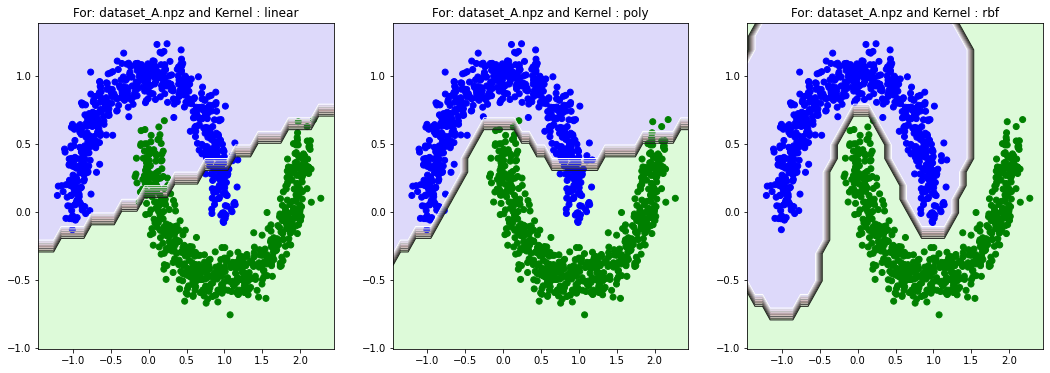

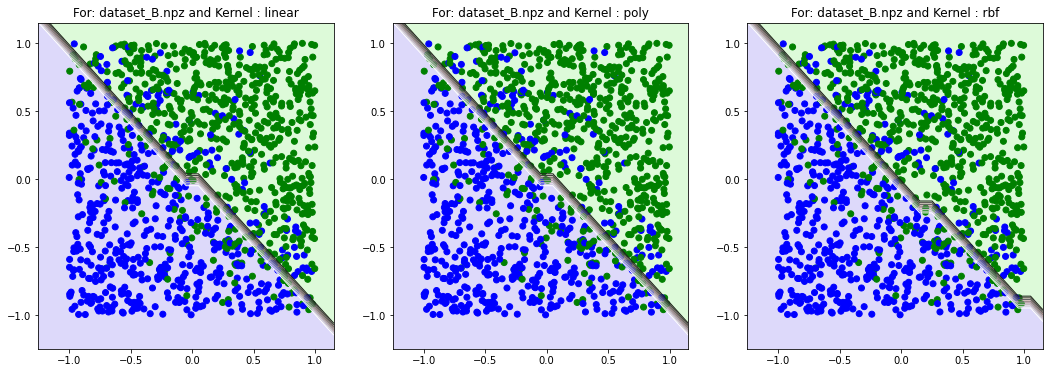

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz"]
kernels=['linear','poly','rbf']
ct=0
for i in range(2):
    X_min, X_max = X_train_all[i][:, 0].min()-.25 , X_train_all[i][:, 0].max()+.25 
    Y_min, Y_max = X_train_all[i][:, 1].min()-.25 , X_train_all[i][:, 1].max()+.25
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),
                     np.arange(Y_min, Y_max, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    plt.figure(figsize=(18,6))
    for j in kernels:
        b = SVM_classifier(X_train_all[i], Y_train_all[i], j, kernel_param[ct], C_param[ct]).predict(grid)
        plt.subplot(1, 3, ct%3 + 1)
        plt.title("For: {} and Kernel : {}".format(l[i],j))
        plt.contourf(xx, yy, b.reshape(xx.shape),alpha=0.15,cmap="brg")
        plt.contour(xx, yy, b.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1)
        plt.scatter(X_train_all[i].T[0],X_train_all[i].T[1],color=['blue' if Y_train_all[i][j]==-1 else 'green' 
                                                                   for j in range(len(X_train_all[i]))])
        ct+=1
    plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [3]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
class Node:
    def __init__(self):
        self.right=None
        self.left=None
        self.feature=-1
        self.threshold=0
        self.pred=0
        self.isl=True
        self.sign=""
        
def entropy(p):
    return -1*(p*np.log(p) + (1-p)*np.log(1-p))
    
def btree1(xtrain,ytrain,num_nodes):
    n1=Node()
    if xtrain.shape[0]<=num_nodes:
        n1.pred=np.sign(np.sum(ytrain))
        return n1
    else:
        ft,thresh,s=0,0,float('inf')
        for i in range(xtrain.shape[1]):
            for j in range(xtrain.shape[0]):
                val=xtrain[j,i]
                ylesser=ytrain[xtrain[:,i]<=val]
                ygreater=ytrain[xtrain[:,i]>val]
                if ylesser.shape[0]==ytrain.shape[0]:
                    plesser=1
                    pgreater=0
                elif ygreater.shape[0]==ytrain.shape[0]:
                    pgreater=1
                    plesser=0
                else:
                    plesser= ylesser[ylesser==1].shape[0]/ylesser.shape[0]
                    pgreater= ygreater[ygreater==1].shape[0]/ygreater.shape[0]
                s_lesser=entropy(plesser)
                s_greater=entropy(pgreater)
                s_avg=(ylesser.shape[0]*s_lesser + ygreater.shape[0]*s_greater)/ytrain.shape[0]
                if s>s_avg:
                    s=s_avg
                    ft=i
                    thresh=val
        n1.feature=ft
        n1.threshold=thresh
        #n1.isl=False
        xleft=xtrain[xtrain[:,ft]<=thresh]
        yleft=ytrain[xtrain[:,ft]<=thresh]
        xright=xtrain[xtrain[:,ft]>thresh]
        yright=ytrain[xtrain[:,ft]>thresh]
        if yright.shape[0]/ytrain.shape[0]<=0.05 or yright.shape[0]/ytrain.shape[0]>=0.95 :
          n1.pred=np.sign(np.sum(ytrain))
          return n1
        else:
          n1.isl=False
          n1.right=btree1(xright,yright,num_nodes)
          n1.left=btree1(xleft,yleft,num_nodes)
          return n1
        
def btree2(xtrain,ytrain,num_nodes):
    n1=Node()
    if xtrain.shape[0]<=num_nodes:
        n1.pred=np.sign(np.sum(ytrain))
        return n1
    else:
        ft,thresh,acc=0,0,0
        sgn=""
        for i in range(xtrain.shape[1]):
          for j in range(xtrain.shape[0]):
            val=xtrain[j,i]
            ylesser=ytrain[xtrain[:,i]<=val]
            ygreater=ytrain[xtrain[:,i]>val]
            split_acc_less = (ylesser[ylesser==-1].shape[0] + ygreater[ygreater==1].shape[0])/ytrain.shape[0]
            split_acc_great = (ylesser[ylesser==1].shape[0] + ygreater[ygreater==-1].shape[0])/ytrain.shape[0]
            if split_acc_less>acc:
                acc=split_acc_less
                ft=i
                thresh=val
                sgn="less"
            if split_acc_great>acc:
              acc=split_acc_great
              ft=i
              thresh=val
              sgn="great"
        n1.feature=ft
        n1.threshold=thresh
        xleft=xtrain[xtrain[:,ft]<=thresh]
        yleft=ytrain[xtrain[:,ft]<=thresh]
        xright=xtrain[xtrain[:,ft]>thresh]
        yright=ytrain[xtrain[:,ft]>thresh]
        
        if yright.shape[0]/ytrain.shape[0]<=0.05 or yright.shape[0]/ytrain.shape[0]>=0.95 :
          n1.pred=np.sign(np.sum(ytrain))
          return n1
        else:
          n1.right=btree2(xright,yright,num_nodes)
          n1.left=btree2(xleft,yleft,num_nodes)
          n1.isl=False
          if n1.left.isl==True:
            if sgn=="less":
              n1.left.pred=-1
            else:
              n1.left.pred=+1
          if n1.right.isl==True:
            if sgn=="less":
              n1.right.pred=+1
            else:
              n1.right.pred=-1
          return n1
    
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    if criterion=='accuracy':
        tree = btree2(X,Y,num_nodes_stop)
    else:
        tree = btree1(X,Y,num_nodes_stop)
    return tree
    

def eval_decision_tree(tree, test_X):
    ypred=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        temp=tree
        while (temp.isl==False):
            if test_X[i,temp.feature]<=temp.threshold:
                temp=temp.left
            else:
                temp=temp.right
        ypred[i]=temp.pred
    return ypred
    

def zero_one_error(preds,y_test):
  return (np.sum(np.abs(preds-y_test))/(2*y_test.shape[0]))


In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
X_train_all=[]
X_valid_all=[]
Y_train_all=[]
Y_valid_all=[]
X_test_all=[]
Y_test_all=[]
l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz", "../../Data/dataset_C.npz","../../Data/dataset_D.npz"]
#l = ["dataset_A.npz","dataset_B.npz"]
for i in l:    
    train=np.load(i)
    X=train[train.files[0]]
    Y=train[train.files[1]]
    X_test=train[train.files[2]]
    Y_test=train[train.files[3]]
    indices = np.random.permutation(len(X))
    Valid_set_size = int(len(X) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train=X[ind1]
    X_valid=X[ind]
    Y_train=Y[ind1]
    Y_valid=Y[ind]
    X_train_all.append(X_train)
    X_valid_all.append(X_valid)
    Y_train_all.append(Y_train)
    Y_valid_all.append(Y_valid)
    X_test_all.append(X_test)
    Y_test_all.append(Y_test)
    
num_nodes=[1,2,4,8,16,32,64,128,256,512]
#print("Criterion=Accuracy")
for i in range(len(l)):
    ac=0
    err_train=0
    err_test=0
    node=0
    for j in num_nodes:
        tree=train_decision_tree(X_train_all[i], Y_train_all[i],j,criterion='accuracy')
        pred=eval_decision_tree(tree, X_valid_all[i])
        pred1=eval_decision_tree(tree, X_train_all[i])
        pred2=eval_decision_tree(tree, X_test_all[i])
        accuracy=np.sum(np.equal(Y_valid_all[i],pred))/len(Y_valid_all[i])
        if accuracy>ac:
            ac=accuracy
            err_train=1-(np.sum(np.equal(Y_train_all[i],pred1))/len(Y_train_all[i]))
            err_test=1-(np.sum(np.equal(Y_test_all[i],pred2))/len(Y_test_all[i]))
            node=j
    
num_nodes=[1,2,4,8,16,32,64,128,256,512]
#print("Criterion=Entropy")
for i in range(len(l)):
    ac=0
    err_train=0
    err_test=0
    node=0
    for j in num_nodes:
        tree=train_decision_tree(X_train_all[i], Y_train_all[i],j,criterion='entropy')
        pred=eval_decision_tree(tree, X_valid_all[i])
        pred1=eval_decision_tree(tree, X_train_all[i])
        pred2=eval_decision_tree(tree, X_test_all[i])
        accuracy=np.sum(np.equal(Y_valid_all[i],pred))/len(Y_valid_all[i])
        if accuracy>ac:
            ac=accuracy
            err_train=1-(np.sum(np.equal(Y_train_all[i],pred1))/len(Y_train_all[i]))
            err_test=1-(np.sum(np.equal(Y_test_all[i],pred2))/len(Y_test_all[i]))
            node=j      

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

The <b>Observations</b> of Decision Tree model<br>
<b>dataset_A</b>


|           | Num_node_stop | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 1         |   8.3        | 7.66            | 10.4             |
| Entropy   | 1         | 7.66            | 3.00             | 6.599              |


<b>dataset_B</b>

|           | Num_node_stop | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 1         |   18.0       | 15.8            | 21.7            |
| Entropy   | 128         | 18.33            | 17.25             | 21.79              |

<b>dataset_C</b>

|           | Num_node_stop | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 1         |   13.0        | 10.499            | 12.79             |
| Entropy   | 1         | 8.67            | 3.75             | 14.48              |

<b>dataset_D</b>

|           | Num_node_stop | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 1         |   8.75        | 5.31            | 9.47             |
| Entropy   | 1         | 7.499           | 3.44             | 11.8             |

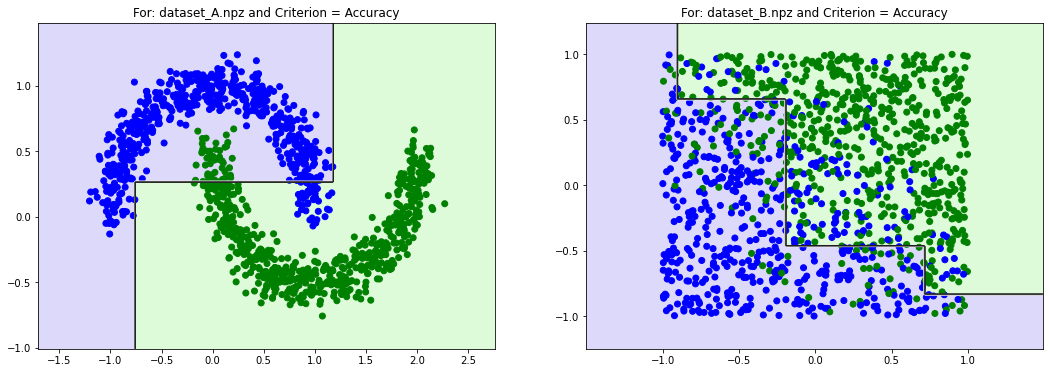

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
np.seterr(divide='ignore', invalid='ignore')
l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz"]
numnodes=[1,32]
plt.figure(figsize=(18,6))
for i in range(2):
    X_min, X_max = X_train_all[i][:, 0].min()-0.5 , X_train_all[i][:, 0].max()+0.5 
    Y_min, Y_max = X_train_all[i][:, 1].min()-0.25 , X_train_all[i][:, 1].max()+0.25
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.01),
                     np.arange(Y_min, Y_max, 0.01))
    a=train_decision_tree(X_train_all[i], Y_train_all[i],numnodes[i],criterion='accuracy')
    b=eval_decision_tree(a,np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, i+1)
    plt.title("For: {} and Criterion = Accuracy".format(l[i]))
    plt.contourf(xx, yy, b.reshape(xx.shape),alpha=0.15,cmap="brg")
    plt.contour(xx, yy, b.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1.0)
    plt.scatter(X_train_all[i].T[0],X_train_all[i].T[1],color=['blue' if Y_train_all[i][j]==-1 else 'green' 
                                                                   for j in range(len(X_train_all[i]))])
    #plt.scatter(X_train_b.T[0],X_train_b.T[1],c=Y_train_b,cmap="brg")
plt.show()


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [4]:
# CodeWrite cell
# Write Random Forest classifier. 
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    tree = []
    for i in range(num_trees):
        indices = np.random.permutation(len(X))
        Valid_set_size = int(len(X) * a)
        ind = indices[:Valid_set_size]
        ind1 = indices[Valid_set_size:]
        X_train=X[ind]
        Y_train=Y[ind]
        tree.append(train_decision_tree(X_train,Y_train,num_nodes_stop,criterion))
    return tree
    

def eval_random_forest(random_forest, test_X):
    ypred=np.zeros(test_X.shape[0])
    for i in range(len(random_forest)):
        ypred += eval_decision_tree(random_forest[i],test_X)
    ypred=ypred/len(random_forest)
    
    ypred = np.sign(ypred)
    ypred[ypred==0]=1
    return ypred



In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
X_train_all=[]
X_valid_all=[]
Y_train_all=[]
Y_valid_all=[]
X_test_all=[]
Y_test_all=[]
l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz", "../../Data/dataset_C.npz","../../Data/dataset_D.npz"]
#l=["dataset_A.npz","dataset_B.npz"]
for i in l:    
    train=np.load(i)
    X=train[train.files[0]]
    Y=train[train.files[1]]
    X_test=train[train.files[2]]
    Y_test=train[train.files[3]]
    indices = np.random.permutation(len(X))
    Valid_set_size = int(len(X) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train=X[ind1]
    X_valid=X[ind]
    Y_train=Y[ind1]
    Y_valid=Y[ind]
    X_train_all.append(X_train)
    X_valid_all.append(X_valid)
    Y_train_all.append(Y_train)
    Y_valid_all.append(Y_valid)
    X_test_all.append(X_test)
    Y_test_all.append(Y_test)
    
num_trees=[1,2,4,8,16,32,64,128,256,512]
#print("Criterion=Accuracy")
for i in range(len(l)):
    ac=0
    err_train=0
    err_test=0
    node=0
    for j in num_trees:
        tree=train_random_forest(X_train_all[i], Y_train_all[i],j,100,criterion='accuracy')
        pred=eval_random_forest(tree, X_valid_all[i])
        pred1=eval_random_forest(tree, X_train_all[i])
        pred2=eval_random_forest(tree, X_test_all[i])
        accuracy=np.sum(np.equal(Y_valid_all[i],pred))/len(Y_valid_all[i])
        if accuracy>ac:
            ac=accuracy
            err_train=1-(np.sum(np.equal(Y_train_all[i],pred1))/len(Y_train_all[i]))
            err_test=1-(np.sum(np.equal(Y_test_all[i],pred2))/len(Y_test_all[i]))
            node=j      
    #print("For Dataset: {}, The best num_trees_stop parameter is {}".format(l[i],node))
    #print("For Dataset: {}, train zero-one error is {}".format(l[i],err_train))
    #print("For Dataset: {}, test zero-one error is {}".format(l[i],err_test))
    #print("For Dataset: {}, valid zero-one error is {}".format(l[i],1-ac))
    
num_trees=[1,2,4,8,16,32,64,128,256,512]
#print("Criterion=Entropy")
for i in range(len(l)):
    ac=0
    err_train=0
    err_test=0
    node=0
    for j in num_trees:
        tree=train_random_forest(X_train_all[i], Y_train_all[i],j,100,criterion='entropy')
        pred=eval_random_forest(tree, X_valid_all[i])
        pred1=eval_random_forest(tree, X_train_all[i])
        pred2=eval_random_forest(tree, X_test_all[i])
        accuracy=np.sum(np.equal(Y_valid_all[i],pred))/len(Y_valid_all[i])
        if accuracy>ac:
            ac=accuracy
            err_train=1-(np.sum(np.equal(Y_train_all[i],pred1))/len(Y_train_all[i]))
            err_test=1-(np.sum(np.equal(Y_test_all[i],pred2))/len(Y_test_all[i]))
            node=j      
    #print("For Dataset: {}, The best num_trees_stop parameter is {}".format(l[i],node))
    #print("For Dataset: {}, train zero-one error is {}".format(l[i],err_train))
    #print("For Dataset: {}, test zero-one error is {}".format(l[i],err_test))
    #print("For Dataset: {}, valid zero-one error is {}".format(l[i],1-ac))


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

The <b>Observations</b> of Random Forest Model model<br>
<b>dataset_A</b>


|           | Number_of_Trees | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 128         |  9.99        | 7.49         | 10.79             |
| Entropy   | 256         | 6.00            | 5.166             | 6.00              |


<b>dataset_B</b>

|           | Number_of_Trees | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 16         |   19.99        | 17.25            | 22.79             |
| Entropy   | 128         | 19.33            | 16.583             | 20.399              |

<b>dataset_C</b>

|           | Number_of_Trees | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 32         |   13.67        | 12.5             | 18.86             |
| Entropy   | 256         | 12.0            | 10.08             | 15.488              |

<b>dataset_D</b>

|           | Number_of_Trees | val error(in %) | train error(in %) | test error(in %) |
|--------   |-----------|--------------|-------------------|------------------|
| Accuracy  | 1         |   7.499        | 7.813            | 9.467             |
| Entropy   | 4         | 6.25            | 6.25             | 5.917              |


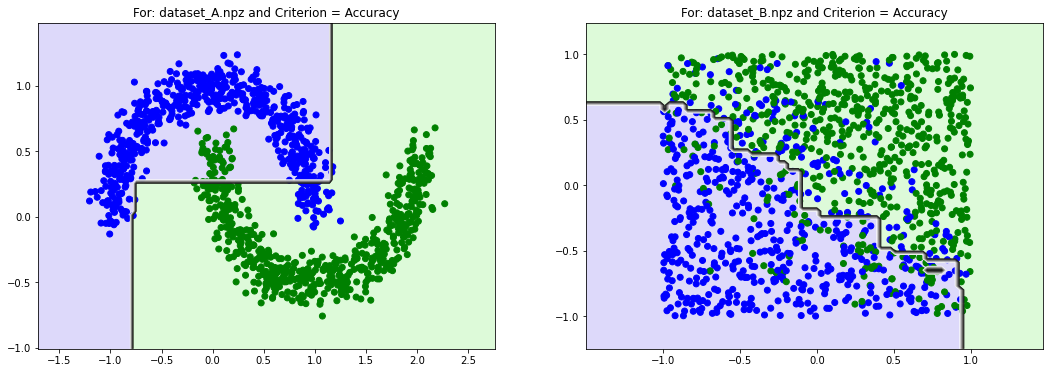

In [6]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

np.seterr(divide='ignore', invalid='ignore')
l=["../../Data/dataset_A.npz","../../Data/dataset_B.npz"]

numnodes=[128,16]
plt.figure(figsize=(18,6))
for i in range(2):
    X_min, X_max = X_train_all[i][:, 0].min()-0.5 , X_train_all[i][:, 0].max()+0.5 
    Y_min, Y_max = X_train_all[i][:, 1].min()-0.25 , X_train_all[i][:, 1].max()+0.25
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.03),
                     np.arange(Y_min, Y_max, 0.03))
    a=train_random_forest(X_train_all[i], Y_train_all[i],numnodes[i],1,criterion='accuracy')
    b=eval_random_forest(a,np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, i+1)
    plt.title("For: {} and Criterion = Accuracy".format(l[i]))
    plt.contourf(xx, yy, b.reshape(xx.shape),alpha=0.15,cmap="brg")
    plt.contour(xx, yy, b.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1.0)
    plt.scatter(X_train_all[i].T[0],X_train_all[i].T[1],color=['blue' if Y_train_all[i][j]==-1 else 'green' 
                                                                   for j in range(len(X_train_all[i]))])
plt.show()


# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [7]:
# Codewrite cell
# Write code to run here (no plotting)
class Node:
    def __init__(self):
        self.right=None
        self.left=None
        self.feature=-1
        self.threshold=0
        self.pred=0
        self.isl=True

def entropy(p):
    return -1*(p*np.log(p) + (1-p)*np.log(1-p))

def depth_based_tree(xtrain, ytrain, weight, depth):
    n1=Node()
    if depth<=0 or xtrain.shape[0] == 0:
        temp = 0
        for i in range(ytrain.shape[0]):
          temp = temp + ytrain[i]*weight[i] 
        if temp == 0:
          n1.pred = 1
        else:
          n1.pred = np.sign(temp)
        return n1
    else:
        ft,thresh,s=0,0,float('inf')
        for i in range(xtrain.shape[1]):
            min, max = xtrain[:, i].min(), xtrain[:, i].max()
            j = np.linspace(min, max, num=20)
            for val in j:
                ylesser = ytrain[xtrain[:,i]<=val]
                wlesser = weight[xtrain[:,i]<=val]
                ygreater = ytrain[xtrain[:,i]>val]
                wgreater = weight[xtrain[:,i]>val]
                if np.sum(wlesser) == np.sum(weight):
                    plesser=1
                    pgreater=0
                elif np.sum(wgreater) == np.sum(weight):
                    pgreater=1
                    plesser=0
                else:
                    plesser= np.sum(wlesser[ylesser==1])/np.sum(wlesser)
                    pgreater= np.sum(wgreater[ygreater==1])/np.sum(wgreater)
                s_lesser=entropy(plesser)
                s_greater=entropy(pgreater)
                s_avg=(np.sum(wlesser)*s_lesser + np.sum(wgreater)*s_greater)/np.sum(weight)
                if s>s_avg:
                    s=s_avg
                    ft=i
                    thresh=val
        n1.feature=ft
        n1.threshold=thresh
        xleft=xtrain[xtrain[:,ft]<=thresh]
        yleft=ytrain[xtrain[:,ft]<=thresh]
        wleft=weight[xtrain[:,ft]<=thresh]
        xright=xtrain[xtrain[:,ft]>thresh]
        yright=ytrain[xtrain[:,ft]>thresh]
        wright=weight[xtrain[:,ft]>thresh]
        if np.sum(wright)/np.sum(weight)<=0.05 or np.sum(wright)/np.sum(weight)>=0.95 :
          temp = 0
          for i in range(ytrain.shape[0]):
            temp = temp + ytrain[i]*weight[i] 
          if temp == 0:
            n1.pred = 1
          else:
            n1.pred = np.sign(temp)
          return n1
        else:
          n1.isl=False
          n1.right=depth_based_tree(xright,yright,wright,depth-1)
          n1.left=depth_based_tree(xleft,yleft,wleft,depth-1)
          return n1
    
def eval_decision_tree(tree, test_X):
    ypred=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        temp=tree
        while (temp.isl==False):
            if test_X[i,temp.feature]<=temp.threshold:
                temp=temp.left
            else:
                temp=temp.right
        ypred[i]=temp.pred
    return ypred

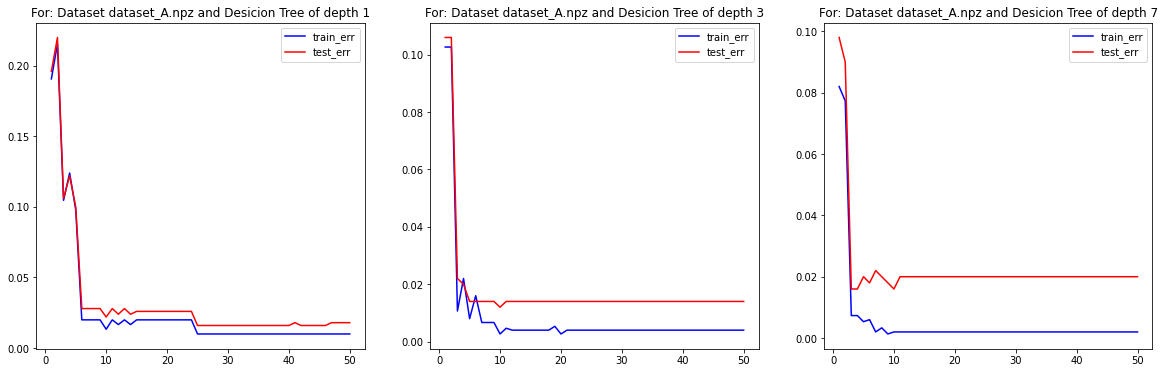

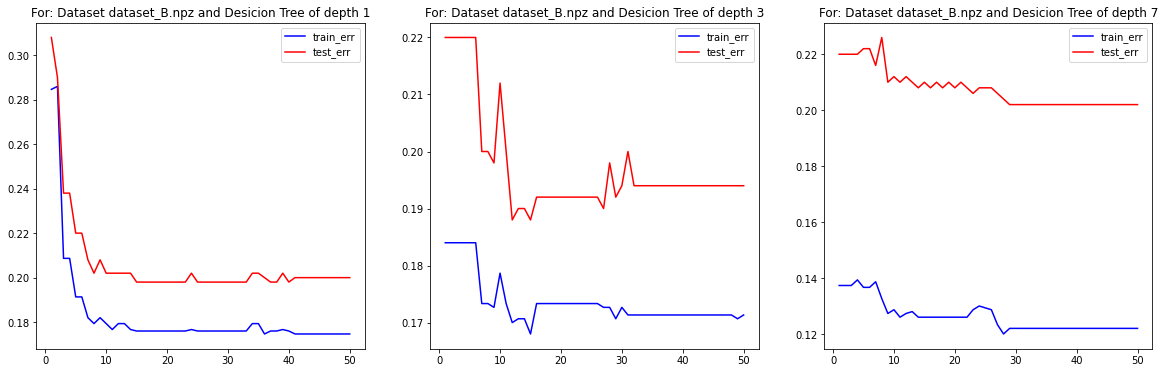

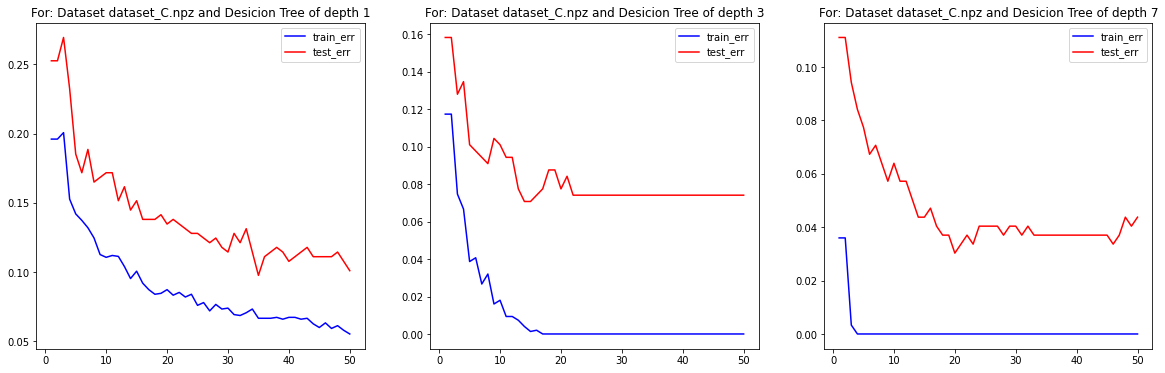

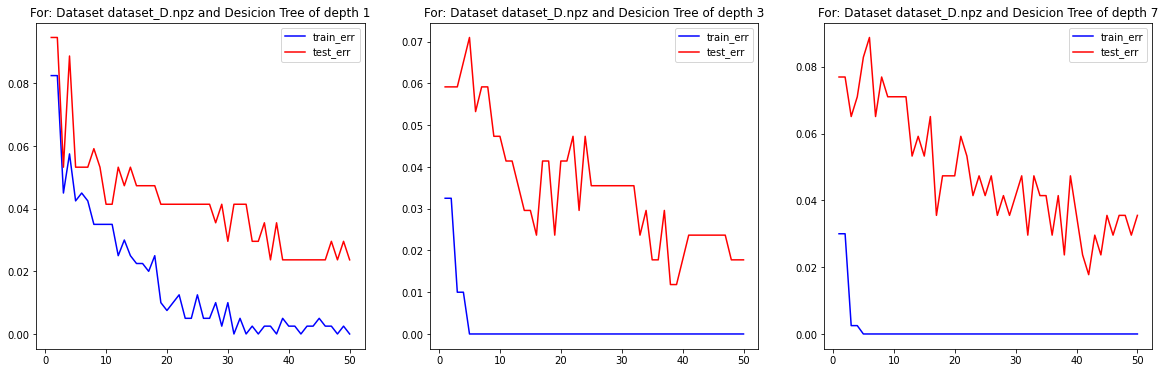

In [8]:
# Codewrite cell 
# Plots for iteration vs error here
np.seterr(divide='ignore', invalid='ignore')
data = ["../../Data/dataset_A.npz","../../Data/dataset_B.npz", "../../Data/dataset_C.npz","../../Data/dataset_D.npz"]

for z in data:
    data=np.load(z)
    X_train = data['arr_0.npy']
    Y_train = data['arr_1.npy']
    X_test = data['arr_2.npy']
    Y_test = data['arr_3.npy']
    T = 50
    depth = [1, 3, 7]
    plt.figure(figsize=(20, 6))
    for p in range(len(depth)):
        w=np.ones(X_train.shape[0],dtype='int')
        l=np.zeros(X_train.shape[0],'int')
        h_s=[]
        beta_s=[]
        for t in range(T):
            h=depth_based_tree(X_train,Y_train,w,depth[p])
            h_x=eval_decision_tree(h, X_train)
            gamma= 0.5 - (((np.dot(w,np.abs(h_x-Y_train)/2))/np.sum(w)))
            beta= (0.5+gamma)/(0.5-gamma)
            l=np.abs(h_x-Y_train)/2
            for i in range(w.shape[0]):
                w[i] = np.ceil(w[i]*pow(beta, l[i]))
            beta_s.append(beta)
            h_s.append(h)
            # print("iter ",t+1,"gamma: ",round(gamma, 3),"beta :", round(beta, 3),"l :",np.sum(np.abs(h_x-Y_train)/2))

            
        ypred_test=np.zeros(Y_test.shape[0])
        ypred_train=np.zeros(Y_train.shape[0])
        train_err = []
        test_err = []
        for i in range(len(h_s)):
            ypred_test = ypred_test + np.log(beta_s[i])*eval_decision_tree(h_s[i],X_test) 
            ypred_train = ypred_train + np.log(beta_s[i])*eval_decision_tree(h_s[i],X_train) 
            train_err.append(np.sum(np.abs(np.sign(ypred_train)-Y_train)/2)/len(Y_train))
            test_err.append(np.sum(np.abs(np.sign(ypred_test)-Y_test)/2)/len(Y_test))
  
        plt.subplot(1, 3, p+1)
        plt.title("For: Dataset {} and Desicion Tree of depth {}".format(z, depth[p]))
        plt.plot(range(1, T+1), train_err, 'b')
        plt.plot(range(1, T+1), test_err, 'r')
        plt.legend(['train_err','test_err'])
    plt.show()

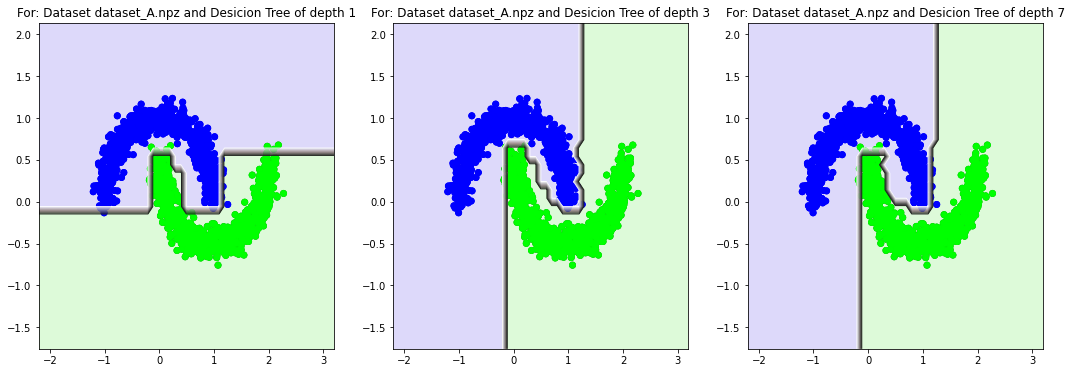

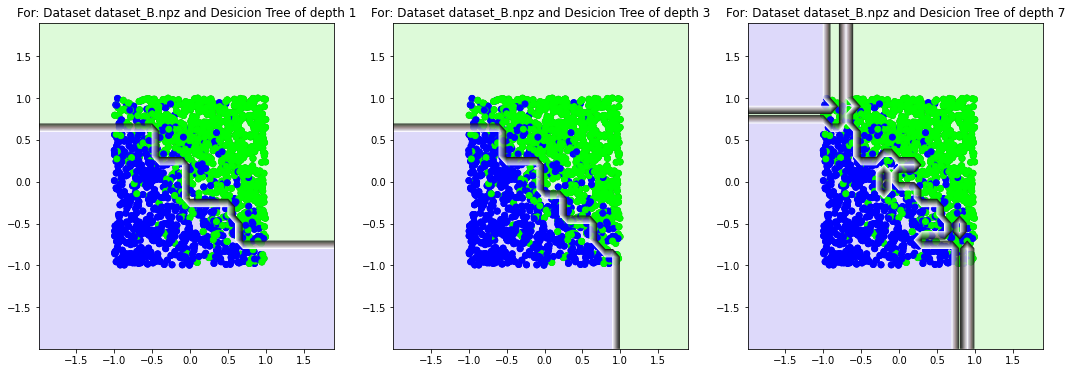

In [10]:
# Codewrite cell 
# Plots for illustrating the classifier here
def evaluate_boost(beta_s,h_s,X_test):
  ypred=np.zeros(X_test.shape[0])
  for i in range(len(beta_s)):
      ypred = ypred + np.log(beta_s[i])*eval_decision_tree(h_s[i],X_test)
  ypred = np.sign(ypred)
  return ypred

for z in ["../../Data/dataset_A.npz", "../../Data/dataset_B.npz"]:
    data=np.load(z)
    X_train = data['arr_0.npy']
    Y_train = data['arr_1.npy']
    X_min, X_max = X_train[:, 0].min()-1 , X_train[:, 0].max()+1 
    Y_min, Y_max =X_train[:, 1].min()-1 , X_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),
                     np.arange(Y_min, Y_max, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    T = 50
    depth = [1, 3, 7]
    plt.figure(figsize=(18, 6))
    for p in range(len(depth)):
        w=np.ones(X_train.shape[0],dtype='int')
        l=np.zeros(X_train.shape[0],'int')
        h_s=[]
        beta_s=[]
        for t in range(T):
            h=depth_based_tree(X_train,Y_train,w,depth[p])
            h_x=eval_decision_tree(h, X_train)
            gamma= 0.5 - (((np.dot(w,np.abs(h_x-Y_train)/2))/np.sum(w)))
            beta= (0.5+gamma)/(0.5-gamma)
            l=np.abs(h_x-Y_train)/2
            for i in range(w.shape[0]):
                w[i] = np.ceil(w[i]*pow(beta,l[i]))
            beta_s.append(beta)
            h_s.append(h)
            
        Z=evaluate_boost(beta_s,h_s,grid)
        plt.subplot(1, 3, p+1)
        plt.contourf(xx, yy, Z.reshape(xx.shape),alpha=0.15,cmap="brg")
        plt.contour(xx, yy, Z.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1)
        plt.scatter(X_train.T[0],X_train.T[1],color=['blue' if Y_train[j]==-1 else 'green' 
                                                                   for j in range(len(X_train))])
        plt.scatter(X_train.T[0],X_train.T[1],c=Y_train,cmap="brg")
        plt.title("For: Dataset {} and Desicion Tree of depth {}".format(z, depth[p]))
    plt.show()
